### ***Задание***
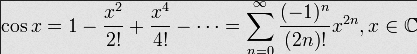
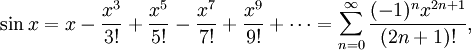
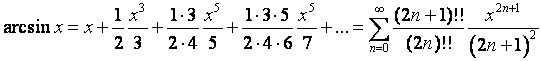
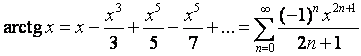
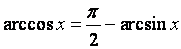

In [203]:
from math import factorial, asin, pi
from decimal import *
class Trigonometry:

    def convert(x):
        return x * pi / 180

    def sin(self, x):
        n = 50
        s = 0
        for i in range(n):
            # Ряд Тейлора для ф-ии синуса
            s1 = ((-1)**(i) * x**(2 * i + 1)) / factorial(2 * i + 1)
            s += s1
        return s

    def cos(self, x):
        n = 50
        s = 0
        for i in range(n):
            # Ряд Тейлора для ф-ии косинуса
            s1 = ((-1)**(i) * x**(2 * i)) / factorial(2 * i)
            s += s1
        return s

    def tg(self, x):
        return self.sin(x) / self.cos(x)

    def arctg(self, x):
        n = 100
        s = 0
        for i in range(n):
            s1 = ((-1)**(i) * x**(2 * i + 1)) / (2 * i + 1)
            s += s1
        return s
    
    def arcsin(self, x):
        return asin(x)
# Overflow
#         for i in range(n):
#             s1 = factorial(factorial(2*n + 1)) / factorial(factorial(2 * n)) * x**(2 * n + 1)) / (2 * n + 1)**2
#             print(s1)
#             s += s1
#         return s

    def arccos(self, x):
        return pi/2 - self.arcsin(x)


## 1.2. Теоретический материал – Реализация деревьев в Python

Любое представление графов, естественно, можно использовать для представления деревьев, потому что деревья — это особый вид графов. Однако, деревья играют свою большую роль в алгоритмах, и для них разработано много соответствующих структур и методов. Большинство алгоритмов на деревьях (например, поиск по деревьям) можно рассматривать в терминах теории графов, но специальные структуры данных делают их проще в реализации.

Проще всего описать представление дерева с корнем, в котором ребра спускаются вниз от корня. Такие деревья часто отображают иерархическое ветвление данных, где корень отображает все объекты (которые, возможно, хранятся в листьях), а каждый внутренний узел показывает объекты, содержащиеся в дереве, корень которого — этот узел. Это описание можно использовать, представив каждое поддерево списком, содержащим все его поддеревья-потомки. Рассмотрим простое дерево, показанное на рисунке ниже. 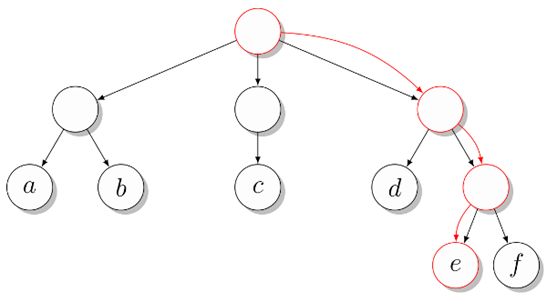

Мы можем представить это дерево как список списков:


In [22]:
T = [["a", "b"], ["c"], ["d", ["e", "f"]]]
print(T[0][1])
print(T[2][1][0])


b
e


Каждый список в сущности является списком потомков каждого из внутренних узлов. Во втором примере мы обращаемся к третьему потомку корня, затем ко второму его потомку и в конце концов — к первому потомку предыдущего узла (этот путь отмечен на рисунке). В ряде случаев возможно заранее определить максимальное число потомков каждого узла. (Например, каждый узел бинарного дерева может иметь до двух потомков). Поэтому можно использовать другие представления, скажем, объекты с отдельным атрибутом для каждого из потомков как в листинге ниже.

### 1.2.1 Пример
Определите класс бинарного дерева и задайте его объекты с отдельным атрибутом для каждого из потомков.

In [23]:
class Tree:
    def __init__(self, left, right):
        self.left = left
        self.right = right
t = Tree(Tree("a", "b"), Tree("c", "d"))
t.right.left

'c'

### 1.2.2 Пример
Для обозначения отсутствующих потомков можно использовать None (в случае если у узла только один потомок). Само собой, можно комбинировать разные методы (например, использовать списки или множества потомков для каждого узла).

Распространенный способ реализации деревьев, особенно на языках, не имеющих встроенной поддержки списков, это так называемое представление «первый потомок, следующий брат». В нем каждый узел имеет два «указателя» или атрибута, указывающих на другие узлы, как в бинарном дереве. Однако, первый из этих атрибутов ссылается на первого потомка узла, а второй — на его следующего брата (т.е. узел, имеющий того же родителя, но находящийся правее, — прим. перев). Иными словами, каждый узел дерева имеет указатель на связанный список его потомков, а каждый из этих потомков ссылается на свой собственный аналогичный список. Таким образом, небольшая модификация бинарного дерева даст нам многопутевое дерево, показанное в листинге ниже.


In [24]:
class Tree:
    def __init__(self, kids, next=None):
        self.kids = self.val = kids
        self.next = next

t = Tree(Tree("a", Tree("b", Tree("c", Tree("d")))))
t.kids.next.next.val

'c'

### Задание
Представьте дерево показанное на рисунке с использованием списка из списков. Выведите на печать корень дерева, а также его левое и правое поддеревья.
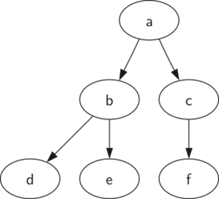

In [28]:
tree = ['a', ['b', ['d',[],[]], ['e',[],[]] ], ['c', ['f',[],[]], []] ]
print(tree[0])
print(tree[1])
print(tree[2])

a
['b', ['d', [], []], ['e', [], []]]
['c', ['f', [], []], []]


### Задание 
Дан класс, описывающий бинарное дерево.

Реализуйте в классе функцию для вставки нового элемента в дерево по следующим правилам:

-	Левое поддерево узла содержит только узлы со значениями меньше, чем значение в узле.
-	Правое поддерево узла содержит только узлы со значениями меньше, чем значение в узле.
-	Каждое из левого и правого поддеревьев также должно быть бинарным деревом поиска.
-	Не должно быть повторяющихся узлов.

Метод вставки сравнивает значение узла с родительским узлом и решает куда доваить элемент (в левое или правое поддерево). Перепишите, метод PrintTree для печати полной версии дерева.


In [63]:
class Tree:
    def __init__(self, data):
        self.left = None
        self.right = None
        self.data = data
        
    def PrintTree(self):
        if self.left:
            self.left.PrintTree()
        if self.right:
            self.right.PrintTree()
        print(self.data)
        

    def insert(self, data):
        if data < self.data:
            if self.left is None:
                self.left = Tree(data)
            else:
                self.left.insert(data)
        elif data > self.data:
            if self.right is None:
                self.right = Tree(data)
            else:
                self.right.insert(data)
    

tree = Tree(27)
tree.insert(14)
tree.insert(35)
tree.insert(10)
tree.insert(19)
tree.insert(31)
tree.insert(42)
tree.PrintTree()

10
19
14
31
42
35
27


## 1.3. Теоретический материал – Деревья решений
Дерево решений – это один из наиболее часто и широко используемых алгоритмов контролируемого машинного обучения, который может выполнять как регрессионные, так и классификационные задачи.
Использование деревьев решений для прогнозного анализа имеет ряд преимуществ:
1.	Деревья решений могут быть использованы для прогнозирования как непрерывных, так и дискретных значений, т. е. они хорошо работают как для задач регрессии, так и для задач классификации.
2.	Они требуют относительно меньших усилий для обучения алгоритма.
3.	Они могут быть использованы для классификации нелинейно разделимых данных.
4.	Они очень быстры и эффективны по сравнению с KNN и другими алгоритмами классификации.

Решим модельные примеры классификации и регрессии, разобранные в предыдущих раочих тетрадях, но с использованием деревьев принятия решений.


### 1.3.1 Пример
Построим дерево решений для задачи классификации, для этого, построим границу решения для каждого класса. В качестве данных будем использовать уже знакомый нам и встроенный в библиотеку sklearn набор данных ирисов Фишера. Импортируем библиотеки, набор данных и посмотрим его характеристики.

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

dataset = sns.load_dataset("iris")
dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [66]:
dataset.shape

(150, 5)

In [67]:
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Далее, разделим наши данные на атрибуты и метки, а затем выделим в общей совокупности полученных данных обучающие и тестовые наборы. Таким образом, мы можем обучить наш алгоритм на одном наборе данных, а затем протестировать его на совершенно на другом наборе, который алгоритм еще не видел. Это дает вам более точное представление о том, как на самом деле будет работать ваш обученный алгоритм.

In [79]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataset.iloc[:, :-1], dataset.iloc[:, -1], test_size = 0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [80]:
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
81,5.5,2.4,3.7,1.0
29,4.7,3.2,1.6,0.2
68,6.2,2.2,4.5,1.5
14,5.8,4.0,1.2,0.2
63,6.1,2.9,4.7,1.4


In [81]:
y_train.head()

81    versicolor
29        setosa
68    versicolor
14        setosa
63    versicolor
Name: species, dtype: object

После того, как данные были разделены на обучающие и тестовые наборы, последний шаг состоит в том, чтобы обучить алгоритм дерева решений на этих данных и сделать прогнозы. Scikit-Learn содержит библиотеку tree , которая содержит встроенные классы/методы для различных алгоритмов дерева решений. Поскольку мы собираемся выполнить здесь задачу классификации, мы будем использовать класс DecisionTreeClassifier для этого примера. Метод fit этого класса вызывается для обучения алгоритма на обучающих данных, которые передаются в качестве параметра методу fit . Выполним следующий сценарий для обучения алгоритма.

In [82]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

[Text(133.92000000000002, 201.90857142857143, 'X[2] <= 2.45\ngini = 0.666\nsamples = 120\nvalue = [42, 37, 41]'),
 Text(100.44000000000001, 170.84571428571428, 'gini = 0.0\nsamples = 42\nvalue = [42, 0, 0]'),
 Text(167.40000000000003, 170.84571428571428, 'X[2] <= 4.75\ngini = 0.499\nsamples = 78\nvalue = [0, 37, 41]'),
 Text(133.92000000000002, 139.78285714285715, 'gini = 0.0\nsamples = 33\nvalue = [0, 33, 0]'),
 Text(200.88000000000002, 139.78285714285715, 'X[3] <= 1.75\ngini = 0.162\nsamples = 45\nvalue = [0, 4, 41]'),
 Text(133.92000000000002, 108.72, 'X[2] <= 5.35\ngini = 0.49\nsamples = 7\nvalue = [0, 3, 4]'),
 Text(100.44000000000001, 77.65714285714284, 'X[3] <= 1.55\ngini = 0.48\nsamples = 5\nvalue = [0, 3, 2]'),
 Text(66.96000000000001, 46.59428571428572, 'X[2] <= 4.95\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(33.480000000000004, 15.531428571428563, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(100.44000000000001, 15.531428571428563, 'gini = 0.0\nsamples = 2

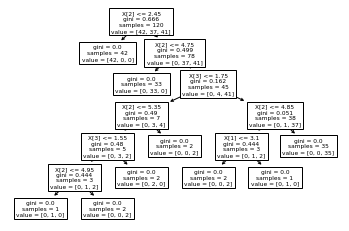

In [88]:
from sklearn import tree
tree.plot_tree(classifier)

Теперь, когда наш классификатор обучен, давайте сделаем прогнозы по тестовым данным. Для составления прогнозов используется метод predict класса Decision Tree Classifier. Взгляните на следующий код для использования.

In [89]:
y_pred = classifier.predict(X_test)
y_pred

array(['virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'virginica', 'versicolor', 'setosa', 'setosa',
       'setosa', 'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'setosa', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'setosa', 'versicolor', 'virginica',
       'virginica', 'versicolor', 'setosa', 'versicolor', 'versicolor'],
      dtype=object)

На данный момент мы обучили наш алгоритм и сделали некоторые прогнозы. Теперь посмотрим, насколько точен наш алгоритм. Для задач классификации обычно используются такие метрики, как матрица путаницы, точность. Библиотека Scikit-Learn metrics содержит методы classification_report и confusion_matrix, которые могут быть использованы для расчета этих метрик.

In [90]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 8  0  0]
 [ 0 13  0]
 [ 0  1  8]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       0.93      1.00      0.96        13
   virginica       1.00      0.89      0.94         9

    accuracy                           0.97        30
   macro avg       0.98      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



Из матрицы оценок алгоритма вы можете видеть, что из 30 тестовых экземпляров наш алгоритм неправильно классифицировал только 1. Это приблизительно 97 % точности.

## 1.4. Теоретический материал – Дерево решений для регрессии

Дерево решений для регрессии
Процесс решения регрессионной задачи с деревом решений с помощью Scikit Learn очень похож на процесс классификации. Однако для регрессии мы используем класс DecisionTreeRegressor древовидной библиотеки. Кроме того, оценочные показатели регрессии отличаются от показателей классификации. В остальном процесс почти такой же.

Построим регрессию с использованием дерева решений в Python и библиотеки scikit-learn. В качестве исходного набора данных будем использовать зависимость заработной платы от опыта работы из предыдущей тетради:

https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv


### 1.4.1 Пример
Постойте регрессию с использованием дерева решений, реализованного в Python.

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = r"https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv"
dataset = pd.read_csv(url)
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [93]:
print(dataset.shape)
dataset.describe()

(30, 2)


,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


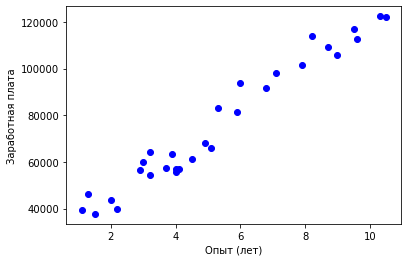

In [94]:
# Точечная диаграмма
plt.scatter(dataset["YearsExperience"], dataset["Salary"], color='b', label="Заработная плата")
plt.xlabel("Опыт (лет)")
plt.ylabel("Заработная плата")
plt.show()

In [96]:
from sklearn.tree import DecisionTreeRegressor
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values
print(X)
print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


DecisionTreeRegressor()

[Text(165.95689655172413, 203.85, 'X[0] <= 5.2\nmse = 614737637.832\nsamples = 24\nvalue = 73886.208'),
 Text(69.26896551724138, 176.67000000000002, 'X[0] <= 2.55\nmse = 81200345.857\nsamples = 14\nvalue = 54976.0'),
 Text(23.089655172413792, 149.49, 'X[0] <= 1.2\nmse = 7820714.0\nsamples = 4\nvalue = 42241.0'),
 Text(11.544827586206896, 122.31, 'mse = 0.0\nsamples = 1\nvalue = 39343.0'),
 Text(34.63448275862069, 122.31, 'X[0] <= 2.1\nmse = 6694994.667\nsamples = 3\nvalue = 43207.0'),
 Text(23.089655172413792, 95.13, 'X[0] <= 1.65\nmse = 1795600.0\nsamples = 2\nvalue = 44865.0'),
 Text(11.544827586206896, 67.94999999999999, 'mse = 0.0\nsamples = 1\nvalue = 46205.0'),
 Text(34.63448275862069, 67.94999999999999, 'mse = 0.0\nsamples = 1\nvalue = 43525.0'),
 Text(46.179310344827584, 95.13, 'mse = 0.0\nsamples = 1\nvalue = 39891.0'),
 Text(115.44827586206895, 149.49, 'X[0] <= 4.7\nmse = 19731272.6\nsamples = 10\nvalue = 60070.0'),
 Text(92.35862068965517, 122.31, 'X[0] <= 4.25\nmse = 949992

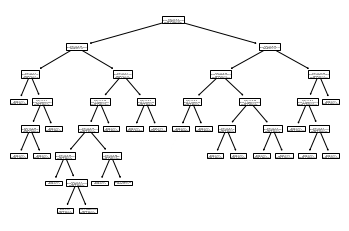

In [97]:
from sklearn import tree
tree.plot_tree(regressor)

In [98]:
y_pred = regressor.predict(X_test)

In [99]:
df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
df

,Actual,Predicted
0,37731.0,46205.0
1,122391.0,121872.0
2,57081.0,56375.5
3,63218.0,56375.5
4,116969.0,112635.0
5,109431.0,105582.0


In [100]:
from sklearn import metrics
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
print("MAE:", metrics.mean_absolute_error(y_test, y_pred))

MSE: 25498988.416666668
MAE: 4120.666666666667


In [102]:
metrics.mean_absolute_error(y_test, y_pred) / np.average(y) * 100

5.421715809463662

Средняя абсолютная ошибка для нашего алгоритма составляет 4120.66, что составляет менее 6 процентов от среднего значения всех значений в столбце.

## Задание
Постройте модель регрессии для данных из предыдущей рабочей тетради.Для примера можно взять потребления газа (в миллионах галлонов) в 48 штатах США или набор данных о качестве красного вина:

https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv

https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv

Постройте прогноз. Оцените точность модели.


In [178]:
# Petrol Dataset
df = pd.read_csv("https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv")
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [179]:
df.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


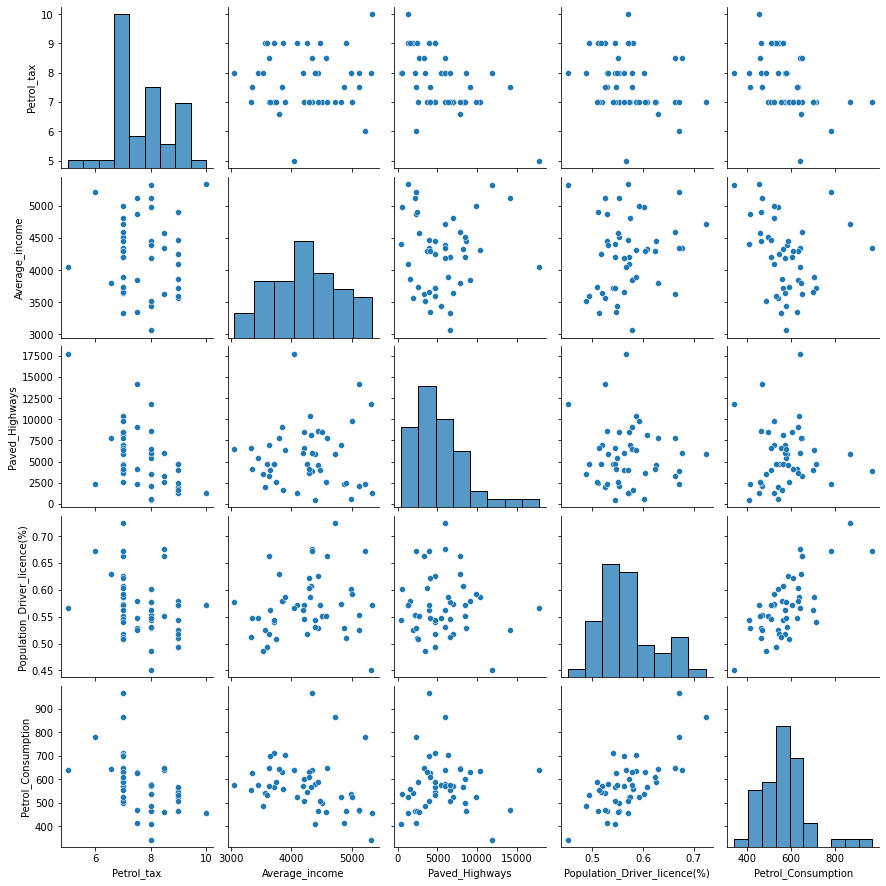

In [155]:
sns.pairplot(df)

In [180]:
from sklearn.tree import DecisionTreeRegressor
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values
print(X)
print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

[[9.0000e+00 3.5710e+03 1.9760e+03 5.2500e-01]
 [9.0000e+00 4.0920e+03 1.2500e+03 5.7200e-01]
 [9.0000e+00 3.8650e+03 1.5860e+03 5.8000e-01]
 [7.5000e+00 4.8700e+03 2.3510e+03 5.2900e-01]
 [8.0000e+00 4.3990e+03 4.3100e+02 5.4400e-01]
 [1.0000e+01 5.3420e+03 1.3330e+03 5.7100e-01]
 [8.0000e+00 5.3190e+03 1.1868e+04 4.5100e-01]
 [8.0000e+00 5.1260e+03 2.1380e+03 5.5300e-01]
 [8.0000e+00 4.4470e+03 8.5770e+03 5.2900e-01]
 [7.0000e+00 4.5120e+03 8.5070e+03 5.5200e-01]
 [8.0000e+00 4.3910e+03 5.9390e+03 5.3000e-01]
 [7.5000e+00 5.1260e+03 1.4186e+04 5.2500e-01]
 [7.0000e+00 4.8170e+03 6.9300e+03 5.7400e-01]
 [7.0000e+00 4.2070e+03 6.5800e+03 5.4500e-01]
 [7.0000e+00 4.3320e+03 8.1590e+03 6.0800e-01]
 [7.0000e+00 4.3180e+03 1.0340e+04 5.8600e-01]
 [7.0000e+00 4.2060e+03 8.5080e+03 5.7200e-01]
 [7.0000e+00 3.7180e+03 4.7250e+03 5.4000e-01]
 [7.0000e+00 4.7160e+03 5.9150e+03 7.2400e-01]
 [8.5000e+00 4.3410e+03 6.0100e+03 6.7700e-01]
 [7.0000e+00 4.5930e+03 7.8340e+03 6.6300e-01]
 [8.0000e+00 

In [181]:
regressor = DecisionTreeRegressor(criterion='mse')
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

[Text(163.28973214285713, 203.85, 'X[1] <= 4396.0\nmse = 288278.46\nsamples = 38\nvalue = 4317.526'),
 Text(73.98482142857144, 176.67000000000002, 'X[1] <= 3955.0\nmse = 103912.083\nsamples = 23\nvalue = 3964.217'),
 Text(28.398214285714285, 149.49, 'X[1] <= 3464.0\nmse = 28944.0\nsamples = 11\nvalue = 3659.0'),
 Text(11.957142857142857, 122.31, 'X[1] <= 3345.0\nmse = 144.0\nsamples = 2\nvalue = 3345.0'),
 Text(5.978571428571429, 95.13, 'mse = 0.0\nsamples = 1\nvalue = 3333.0'),
 Text(17.935714285714287, 95.13, 'mse = 0.0\nsamples = 1\nvalue = 3357.0'),
 Text(44.839285714285715, 122.31, 'X[1] <= 3773.5\nmse = 8564.84\nsamples = 9\nvalue = 3728.778'),
 Text(29.892857142857142, 95.13, 'X[1] <= 3687.0\nmse = 3606.556\nsamples = 6\nvalue = 3674.333'),
 Text(17.935714285714287, 67.94999999999999, 'X[0] <= 8.75\nmse = 1306.889\nsamples = 3\nvalue = 3620.667'),
 Text(11.957142857142857, 40.77000000000001, 'X[3] <= 0.613\nmse = 110.25\nsamples = 2\nvalue = 3645.5'),
 Text(5.978571428571429, 13

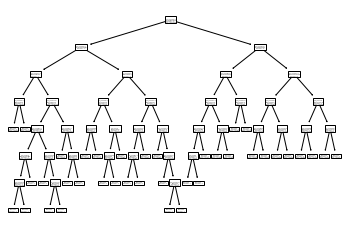

In [182]:
from sklearn import tree
tree.plot_tree(regressor)

In [183]:
y_pred = regressor.predict(X_test)

res = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
res

,Actual,Predicted
0,3601,3571.0
1,4399,4447.0
2,3448,3357.0
3,3640,3656.0
4,3063,3333.0
5,3897,3846.0
6,3528,3656.0
7,4449,4447.0
8,5126,5319.0
9,4391,4341.0


In [184]:
from sklearn import metrics
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
print("MAE:", metrics.mean_absolute_error(y_test, y_pred))

MSE: 14337.9
MAE: 87.9


In [185]:
metrics.mean_absolute_error(y_test, y_pred) / np.average(y) * 100

2.072217201681663

[Text(132.11470588235295, 203.85, 'X[1] <= 4140.0\nmae = 431.158\nsamples = 38\nvalue = 4309.0'),
 Text(41.85, 176.67000000000002, 'X[1] <= 3464.0\nmae = 163.462\nsamples = 13\nvalue = 3721.0'),
 Text(22.976470588235298, 149.49, 'X[1] <= 3345.0\nmae = 12.0\nsamples = 2\nvalue = 3345.0'),
 Text(16.411764705882355, 122.31, 'mae = 0.0\nsamples = 1\nvalue = 3333.0'),
 Text(29.541176470588237, 122.31, 'mae = 0.0\nsamples = 1\nvalue = 3357.0'),
 Text(60.72352941176471, 149.49, 'X[1] <= 3955.0\nmae = 122.636\nsamples = 11\nvalue = 3745.0'),
 Text(42.67058823529412, 122.31, 'X[1] <= 3773.5\nmae = 75.333\nsamples = 9\nvalue = 3721.0'),
 Text(26.258823529411767, 95.13, 'X[1] <= 3687.0\nmae = 53.667\nsamples = 6\nvalue = 3687.0'),
 Text(13.129411764705884, 67.94999999999999, 'X[2] <= 2625.0\nmae = 28.333\nsamples = 3\nvalue = 3635.0'),
 Text(6.564705882352942, 40.77000000000001, 'mae = 0.0\nsamples = 1\nvalue = 3571.0'),
 Text(19.694117647058825, 40.77000000000001, 'X[1] <= 3645.5\nmae = 10.5\nsa

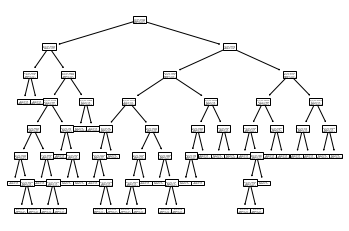

In [186]:
regressor1 = DecisionTreeRegressor(criterion='mae')
regressor1.fit(X_train, y_train)

from sklearn import tree
tree.plot_tree(regressor1)

In [187]:
y_pred1 = regressor1.predict(X_test)

res = pd.DataFrame({"Actual": y_test, "Predicted": y_pred1})
res

,Actual,Predicted
0,3601,3635.0
1,4399,4447.0
2,3448,3357.0
3,3640,3635.0
4,3063,3333.0
5,3897,3802.0
6,3528,3635.0
7,4449,4476.0
8,5126,5126.0
9,4391,4341.0


In [188]:
from sklearn import metrics
print("MSE:", metrics.mean_squared_error(y_test, y_pred1))
print("MAE:", metrics.mean_absolute_error(y_test, y_pred1))

MSE: 10836.9
MAE: 72.7


In [189]:
metrics.mean_absolute_error(y_test, y_pred1) / np.average(y) * 100

1.713881576362422

При одинаковых выборках:

Средняя абсолютная ошибка для нашего алгоритма при выборе критерия для измерения качества разделения **MSE** составляет 14337.9, что составляет 2.07 процента от среднего значения всех значений в столбце.

Средняя абсолютная ошибка для нашего алгоритма при выборе критерия для измерения качества разделения **MAE** составляет 10836.9, что составляет 1.71 процента от среднего значения всех значений в столбце.